In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import cm
%matplotlib inline


In [166]:
path = '~/data/ACLED/country-jul23/2017-01-01-2021-07-23-Afghanistan.csv'
path = '~/data/ACLED/country-jul23/2018-01-01-2021-07-23-Brazil.csv'
# path = '~/data/ACLED/country-jul23/2015-01-01-2021-07-23-Yemen.csv'
# path = '~/data/ACLED/country-jul23/2018-01-01-2021-07-23-Russia.csv'
# path = '~/data/ACLED/country-jul23/2016-01-01-2021-07-23-Turkey.csv'
# path = '~/data/ACLED/country-jul23/2020-01-01-2021-07-23-United_States.csv'
# path = '~/data/ACLED/country-jul23/2017-01-01-2021-07-23-Syria.csv'

country_name = path.split('-')[7][:-4]
print(country_name,'country_name')

filename = path.split('/')[-1]
print('path',path,'filename',filename)
start_year = int(filename.split('-')[0])
start_month = int(filename.split('-')[1])
start_day = int(filename.split('-')[2])
end_year = int(filename.split('-')[3])
end_month = int(filename.split('-')[4])
end_day = int(filename.split('-')[5])

df = pd.read_csv(path,sep=';')
df = df.drop_duplicates(subset=['data_id'], keep='first')
df['event_date'] = pd.to_datetime(df['event_date'])
print(df.columns)

Brazil country_name
path ~/data/ACLED/country-jul23/2018-01-01-2021-07-23-Brazil.csv filename 2018-01-01-2021-07-23-Brazil.csv
Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')


In [167]:
df[['event_type','sub_event_type']]
# df['time_precision'].unique()
df.sort_values(by=['event_date'],inplace=True ) 
print(df.value_counts('year'))
print(df['admin1'].unique().shape)
df.value_counts('admin1')
# df = df.loc[df['location']=='Sao Paulo']
# df.value_counts('sub_event_type')
df.value_counts('event_type')


# def movingaverage(interval, window_size):
#     window = np.ones(int(window_size))/float(window_size)
#     return np.convolve(interval, window, 'same')

def movingaverage(a, n=3) :
    padding = []
    for i in range(n-1):
        padding.append(a[:i+1].mean())
    padding = np.array(padding)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate((padding, ret[n - 1:] / n),0)

year
2018    16498
2019    11252
2020    10078
2021     6371
dtype: int64
(27,)


In [168]:
# df.head()[['data_id', 'event_date', 'event_type', 'sub_event_type', 'actor1','actor2',
#        'assoc_actor_1',  'region', 'country', 'admin1',
#        'admin2', 'admin3', 'location', 'latitude', 'longitude',
#        'geo_precision',  'notes', 'fatalities' ]]

In [169]:
event_type_column = 'sub_event_type'
event_type_column = 'event_type'
delta_value = 1
if delta_value == 1:
    level = 'day'
elif delta_value == 7:
    level = 'week'
elif delta_value == 14:
    level = 'biweek'
elif delta_value == 30:
    level = 'month'
subevents = df[event_type_column].unique()
print(len(subevents),subevents)
subevent_count_dict = {}
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
n_days = 0
last_date = start_date - delta
while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date = start_date
    start_date += delta
    n_days += 1
print('n_days =',n_days)
# print('n_days =',len(df['event_date'].unique()))
for v in subevents:
    subevent_count_dict[v] = np.array([0 for i in range(n_days)])


6 ['Explosions/Remote violence' 'Battles' 'Riots' 'Protests'
 'Violence against civilians' 'Strategic developments']
n_days = 1300


In [170]:
# for loop day.... save count of each subevent.
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
day_i = 0
last_date = start_date - delta
# print('last_date',last_date,'start_date',start_date,'end_date',end_date)

while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date_str = last_date.strftime("%Y-%m-%d") #("%d %B %Y")
    date_str = start_date.strftime("%Y-%m-%d")
#     print('last_date_str',last_date_str,' --- date_str',date_str)
    df_day = df.loc[(df['event_date'] > last_date_str) & (df['event_date'] <= date_str)]
    if day_i%300==0:
        print('#',len(df_day),len(df))
#         print(df_day['sub_event_type'] )
    df_count = df_day[event_type_column].value_counts().rename_axis('unique_values').reset_index(name='counts')
#     print('df_count',df_count)
    for i,row in df_count.iterrows():
        subevent_count_dict[row['unique_values']][day_i] = row['counts']
    last_date = start_date
    start_date += delta
    day_i += 1
print('day_i =',day_i)

# 31 44199
# 17 44199
# 33 44199
# 31 44199
# 36 44199
day_i = 1300


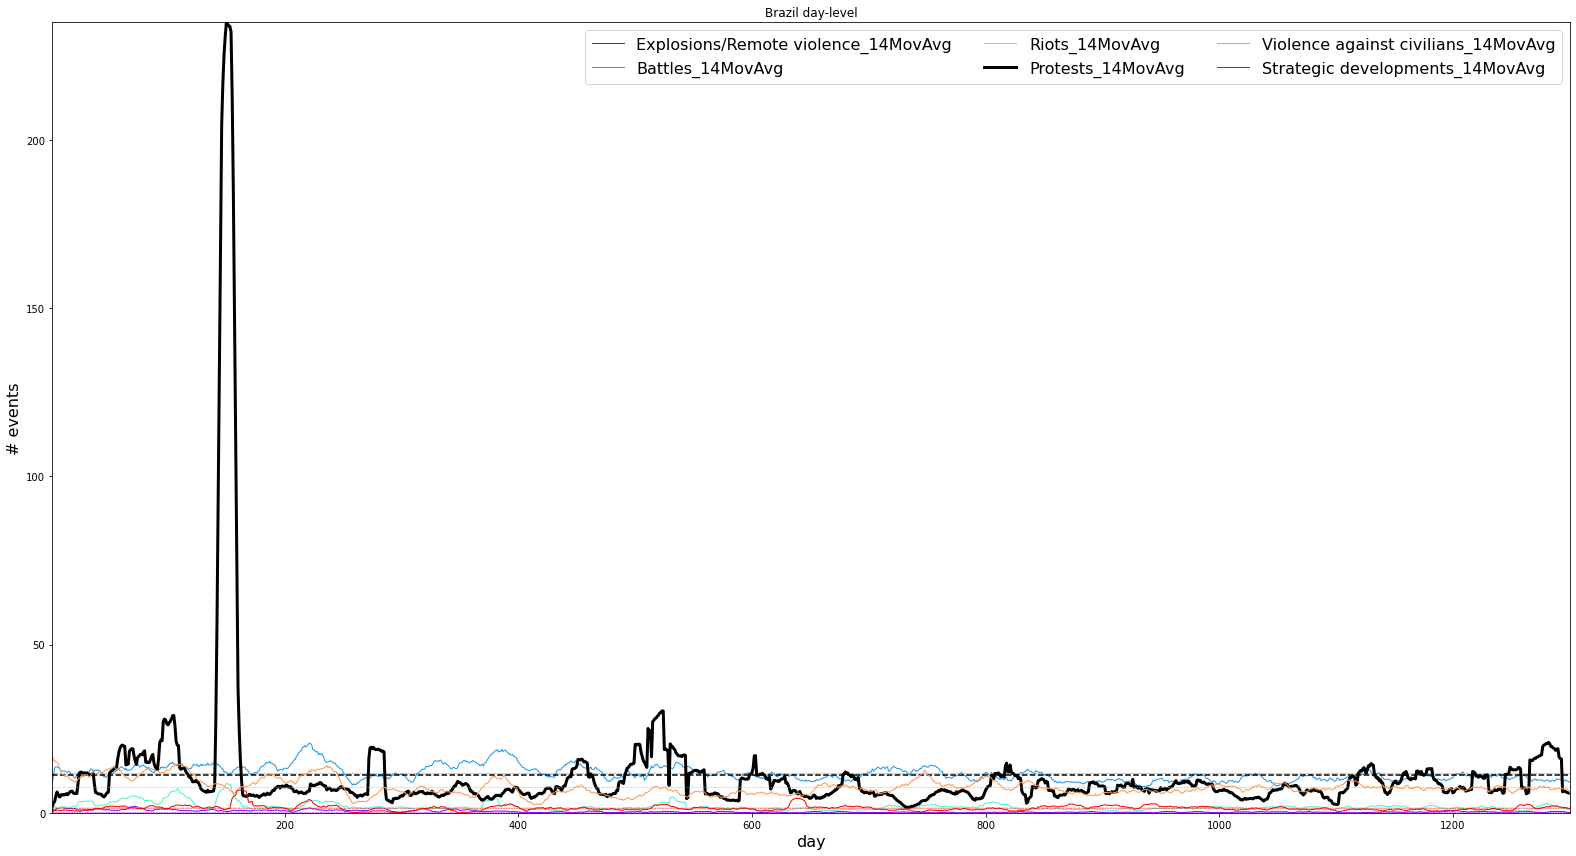

In [171]:
# Fixing random state for reproducibility

t = np.arange(1, day_i+1, 1) 
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(22, 12))
event_set_protest = ['Protest with intervention','Excessive force against protesters','Peaceful protest']
event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Protests', 'Riots']
# event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Riots']
event_set = [  'Strategic developments','Violence against civilians', 'Protests', 'Riots']

# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
# color2 = ['#080808','#333030','#6e6a6a']
for i in range(len(subevents)):
#     print(subevents[i])
    if subevents[i] in event_set or True :
        length = day_i
        cur_t = t[:length]
        ma_day = 14
        count_data = subevent_count_dict[subevents[i]][:length]
#         axs.plot(cur_t, count_data, 'o',label=subevents[i])
        ma = movingaverage(count_data,ma_day)
        cur_label = subevents[i]+'_'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = subevents[i]
        if subevents[i] in ['Protests']:
#             axs.plot(t[:], ma, '-',label=cur_label,color=color[i],linewidth=4)
#             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=4)
            axs.plot(cur_t, ma, '-',label=cur_label,color='black',linewidth=3)
            axs.axhline(y=count_data.mean(), color='black',  linestyle='--',linewidth=1.5)
        else:
            axs.plot(cur_t, ma, '-',label=cur_label,color=color[i],linewidth=1)
            axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=0.5)
            
# #         axs.plot(t, subevent_count_dict[subevents[i]], 's',label=subevents[i])
#         ma_day = 14
#         count_data = subevent_count_dict[subevents[i]][:]
#         ma = movingaverage(count_data,ma_day)
#         cur_label = subevents[i]+'_'+str(ma_day)+'MovAvg'
#         if ma_day == 1:
#             cur_label = subevents[i]
#         if subevents[i] in ['Protests']:
# #             axs.plot(t[:], ma, '-',label=cur_label,color=color[i],linewidth=4)
# #             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=4)
#             axs.plot(t[:], ma, '-',label=cur_label,color='black',linewidth=4)
#             axs.axhline(y=count_data.mean(), color='black',  linestyle='--',linewidth=2)
#         else:
#             axs.plot(t[:], ma, '-',label=cur_label,color=color[i])
#             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--')
            
axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
# axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')

fig.tight_layout()
plt.show()
fig.savefig('time_series/{}_{}_main.pdf'.format(country_name,level), bbox_inches='tight')

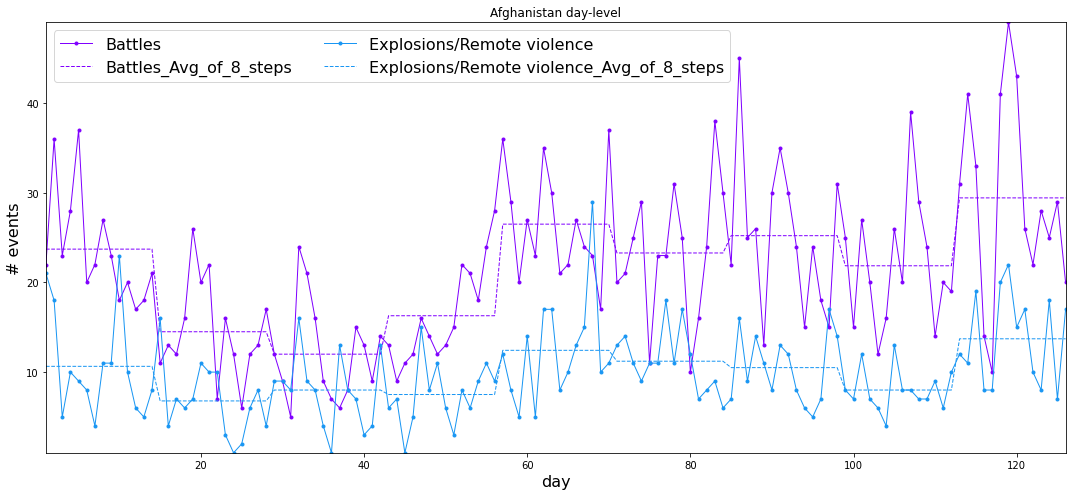

In [152]:
# check moving average

t = np.arange(1, day_i+1, 1) 
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(15, 7))
event_set_protest = ['Protest with intervention','Excessive force against protesters','Peaceful protest']
event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Protests', 'Riots']
# event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Riots']
event_set = [  'Strategic developments','Violence against civilians', 'Protests', 'Riots']

# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
# color2 = ['#080808','#333030','#6e6a6a']
for i in range(len(subevents)):
#     print(subevents[i])
    if subevents[i] in ['Battles','Explosions/Remote violence'] :
#         axs.plot(t, subevent_count_dict[subevents[i]], 's',label=subevents[i])
        ma_day = 1
        count_data = subevent_count_dict[subevents[i]][:126]
        ma = movingaverage(count_data,ma_day)
        cur_label = subevents[i]+'_'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = subevents[i]
         
        axs.plot(t[:126], ma, '.-',label=cur_label,color=color[i],linewidth=1)
        avg_data = get_avg(count_data,day=14)
        axs.plot(t[:126],avg_data, color=color[i],  linestyle='--',label=subevents[i]+'_'+'Avg_of_8_steps',linewidth=1)
#         axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--')
         

axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
# axs.grid(True)
axs.legend(prop={'size': 16},ncol=2)
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))

fig.tight_layout()
plt.show()
fig.savefig('time_series/{}_{}_main_eg'.format(country_name,level), bbox_inches='tight')


In [76]:
def get_avg(x,day=7):
    r = []
    for i in range(0,len(x),day):
        avg = x[i:i+day].mean()
        r += [avg for i in range(day)]
    r = np.array(r)
#     print(r)
    return r
x = subevent_count_dict[subevents[0]]
v = get_avg(x,day=7)
v.shape,x.shape

((238,), (238,))